Smeet Sheth
016786133
Data 255: HW2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils import to_categorical

In [10]:
#Q1 a:Convolutional Neural Network Model from Scratch
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),BatchNormalization(), MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),BatchNormalization(),MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),BatchNormalization(),MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),BatchNormalization(),MaxPooling2D((2, 2)),Flatten(),
    Dense(256, activation='relu'),Dropout(0.5),
    Dense(128, activation='relu'),Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                        

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/15
938/938 [==============================] - 20s 21ms/step - loss: 0.5629 - accuracy: 0.8067 - val_loss: 0.3426 - val_accuracy: 0.8738
Epoch 2/15
938/938 [==============================] - 22s 23ms/step - loss: 0.3318 - accuracy: 0.8878 - val_loss: 0.2997 - val_accuracy: 0.8901
Epoch 3/15
938/938 [==============================] - 22s 24ms/step - loss: 0.2771 - accuracy: 0.9048 - val_loss: 0.3241 - val_accuracy: 0.8834
Epoch 4/15
938/938 [==============================] - 22s 24ms/step - loss: 0.2488 - accuracy: 0.9145 - val_loss: 0.3185 - val_accuracy: 0.8876
Epoch 5/15
938/938 [==============================] - 22s 24ms/step - loss: 0.2266 - accuracy: 0.9209 - val_loss: 0.2690 - val_accuracy: 0.9089
Epoch 6/15
938/938 [==============================] - 23s 24ms/step - loss: 0.2048 - accuracy: 0.9291 - val_loss: 0.2508 - val_accuracy: 0.9104
Epoch 7/15
938/938 [==============================] - 22s 24ms/step - loss: 0.1866 - accuracy: 0.9345 - val_loss: 0.2635 - val_accuracy:

In [8]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3347 - accuracy: 0.9167
Test Accuracy: 0.916700005531311


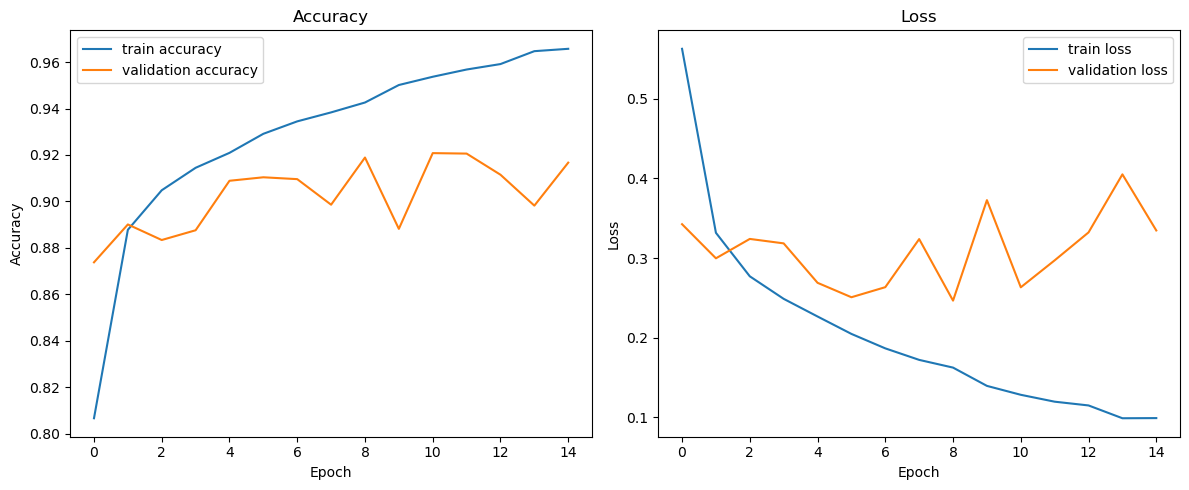

In [9]:
# Plot the learning curve
plt.figure(figsize=(12, 5))
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
#Problem 1: b) Grid Search on CNN model
# Define hyperparameters values
activation_functions = ['relu']
optimizers = ['adam', 'adagrad']
mini_batch_sizes = [4, 8, 16, 32]
learning_rates = [0.001, 0.0001]

In [12]:
# Initialize variables to store optimal hyperparameters and accuracy
best_accuracy = 0.0
optimal_hyperparameters = {}

In [64]:
# Initialize a list to store results for table display
results = []

In [17]:
from itertools import product
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical

# Define hyperparameters
activation_functions = ['relu', 'sigmoid']
optimizers = ['adam', 'sgd']
mini_batch_sizes = [32, 64]
learning_rates = [0.001, 0.01]

# Initialize variables to store best accuracy and optimal hyperparameters
best_accuracy = 0
optimal_hyperparameters = {}
results = []

# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

for activation_function, optimizer, mini_batch_size, learning_rate in product(activation_functions, optimizers, mini_batch_sizes, learning_rates):
    # Build the CNN model
    model_grid = Sequential([
        Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation=activation_function, input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation=activation_function),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation=activation_function),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation=activation_function),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation=activation_function),
        Dropout(0.5),
        Dense(128, activation=activation_function),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    # Compile the model
    model_grid.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model_grid.fit(train_images, train_labels_one_hot, epochs=2, batch_size=mini_batch_size, validation_data=(test_images, test_labels_one_hot), verbose=1)
    # Evaluate the model on the test data
    test_loss, test_accuracy = model_grid.evaluate(test_images, test_labels_one_hot)
    # Update optimal hyperparameters if current accuracy is higher
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        optimal_hyperparameters['Activation function'] = activation_function
        optimal_hyperparameters['Optimizer'] = optimizer
        optimal_hyperparameters['Mini-batch size'] = mini_batch_size
        optimal_hyperparameters['Learning rate'] = learning_rate
    # Store hyperparameter combination and test accuracy
    results.append((f"{activation_function}, {optimizer}, {mini_batch_size}, {learning_rate}", test_accuracy))

# Print results in table format
print("Hyperparameter Combinations\tTest Accuracy")
for hyperparameters, accuracy in results:
    print(f"{hyperparameters}\t{accuracy:.4f}")

# Print optimal hyperparameters and corresponding test accuracy
print("\nOptimal Hyperparameters:")
for key, value in optimal_hyperparameters.items():
    print(f"{key}: {value}")
print("Test Accuracy:", best_accuracy)


Epoch 1/2
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5418 - accuracy: 0.8163 - val_loss: 0.3457 - val_accuracy: 0.8712
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.2827 - accuracy: 0.8963
Epoch 1/2
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5325 - accuracy: 0.8202 - val_loss: 0.3425 - val_accuracy: 0.8688
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.2724 - accuracy: 0.9041
Epoch 1/2
938/938 [==============================] - 25s 26ms/step - loss: 0.5508 - accuracy: 0.8125 - val_loss: 0.3280 - val_accuracy: 0.8751
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.3062 - accuracy: 0.8871
Epoch 1/2
938/938 [==============================] - 25s 27ms/step - loss: 0.5510 - accuracy: 0.8112 - val_loss: 0.3497 - val_accuracy: 0.8753
Epoch 2/2
313/313 [==============================] - 2s 6ms/step - loss: 0.3065 - accuracy: 0.8870
Epoch 1/2
1875/1875 [=======

In [18]:
# Q1 C: Data Augmentation
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

In [21]:
import numpy as np
from keras.utils import to_categorical

# Reshape input data to have rank 4
train_images = np.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = np.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Now you can use the data generator
datagen.fit(train_images)


In [23]:
# Train the model with augmented data
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),steps_per_epoch=len(train_images) / 64, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
937/937 [==============================] - 21s 22ms/step - loss: 0.6876 - accuracy: 0.7576 - val_loss: 0.3808 - val_accuracy: 0.8740
Epoch 2/15
937/937 [==============================] - 21s 23ms/step - loss: 0.5736 - accuracy: 0.8001 - val_loss: 0.5021 - val_accuracy: 0.8158
Epoch 3/15
937/937 [==============================] - 21s 22ms/step - loss: 0.5239 - accuracy: 0.8138 - val_loss: 0.3959 - val_accuracy: 0.8618
Epoch 4/15
937/937 [==============================] - 21s 22ms/step - loss: 0.4925 - accuracy: 0.8281 - val_loss: 0.6600 - val_accuracy: 0.7481
Epoch 5/15
937/937 [==============================] - 21s 22ms/step - loss: 0.4723 - accuracy: 0.8329 - val_loss: 0.3454 - val_accuracy: 0.8804
Epoch 6/15
937/937 [==============================] - 21s 23ms/step - loss: 0.4512 - accuracy: 0.8406 - val_loss: 0.4061 - val_accuracy: 0.8663
Epoch 7/15
937/937 [==============================] - 21s 22ms/step - loss: 0.4380 - accuracy: 0.8473 - val_loss: 0.3330 - val_accuracy:

In [24]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3311 - accuracy: 0.8827
Test Accuracy: 0.8827000260353088


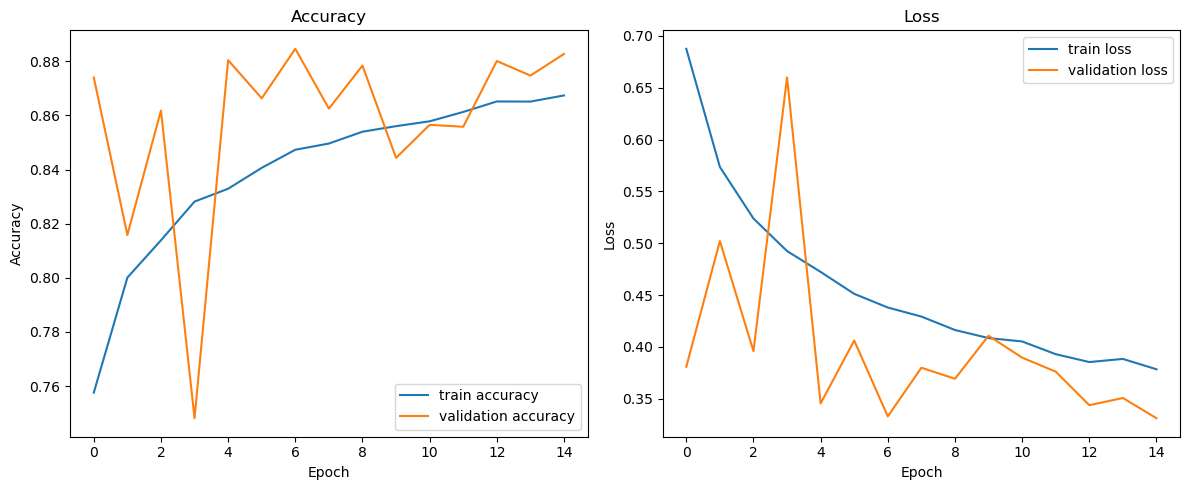

In [25]:
# Plot the learning curve
plt.figure(figsize=(12, 5))
# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# Q1 D) Transfer Learning
from keras.applications import VGG16
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense

In [27]:
# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [28]:
# Freeze the base VGG16 layers
for layer in base_model.layers:
    layer.trainable = False

In [29]:
# Add custom layers on top of the base model
x = base_model.layers[-1].output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [30]:
# Create the final model
model_VGG16 = Model(inputs=base_model.input, outputs=predictions)

In [31]:
# Compile the model
model_VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Print model summary
model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [36]:
import numpy as np
import cv2
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

In [35]:
import subprocess

# Install opencv-python package using pip
try:
    subprocess.run(["pip", "install", "opencv-python"])
    print("opencv-python package installed successfully.")
except Exception as e:
    print("Error occurred while installing opencv-python package:", e)



  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 48.0 MB/s eta 0:00:0000:0100:01
opencv-python package installed successfully.


In [37]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
# Resize images to (48, 48) and convert to RGB
def preprocess_images(images):
    resized_images = []
    for image in images:
        # Resize image to (48, 48)
        resized_image = cv2.resize(image, (48, 48))
        # Convert grayscale to RGB
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
        resized_images.append(resized_image)
    return np.array(resized_images)

In [39]:
# Preprocess images
train_images_preprocessed = preprocess_images(train_images)
test_images_preprocessed = preprocess_images(test_images)

In [40]:
# Preprocess labels
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [41]:
# Train the model
model_VGG16.fit(train_images_preprocessed, train_labels_one_hot, batch_size=64, epochs=15, validation_split=0.1)

Epoch 1/15
844/844 [==============================] - 148s 175ms/step - loss: 0.9418 - accuracy: 0.7940 - val_loss: 0.5039 - val_accuracy: 0.8403
Epoch 2/15
844/844 [==============================] - 148s 176ms/step - loss: 0.4134 - accuracy: 0.8574 - val_loss: 0.4707 - val_accuracy: 0.8488
Epoch 3/15
844/844 [==============================] - 148s 175ms/step - loss: 0.3373 - accuracy: 0.8774 - val_loss: 0.4337 - val_accuracy: 0.8523
Epoch 4/15
844/844 [==============================] - 148s 175ms/step - loss: 0.2994 - accuracy: 0.8909 - val_loss: 0.4502 - val_accuracy: 0.8530
Epoch 5/15
844/844 [==============================] - 148s 175ms/step - loss: 0.2719 - accuracy: 0.8998 - val_loss: 0.4557 - val_accuracy: 0.8545
Epoch 6/15
844/844 [==============================] - 148s 176ms/step - loss: 0.2517 - accuracy: 0.9067 - val_loss: 0.4655 - val_accuracy: 0.8577
Epoch 7/15
844/844 [==============================] - 151s 179ms/step - loss: 0.2317 - accuracy: 0.9131 - val_loss: 0.5006 -

In [65]:
# Evaluate the model
test_loss, test_accuracy = model_VGG16.evaluate(test_images_preprocessed, test_labels_one_hot)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 26s 84ms/step - loss: 0.7318 - accuracy: 0.8478
Test Accuracy: 0.8478000164031982
